We consider a neural network with two inputs, 1 hidden layer with 3 hidden nodes, and one output. We are using the ReLU activation function at the hidden nodes. Mathematically, this can be represented as:

$$
h = \sigma \left( W^T x + b\right), ~~~ z = V^T h + c
$$

where $\sigma$ denotes the ReLU activation and

$~~~~~~~~W =
\begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{bmatrix},~
$
$b =
\begin{bmatrix}
b_{1}\\
b_{2}\\
b_{3}
\end{bmatrix},
$
$V = \begin{bmatrix}
v_{1}  \\
v_{2}\\
v_{3}
\end{bmatrix}$, c

are the weights and the bias of the network. We will denote the output $z$ of this network as $f(\theta, x)$.

For a data point $(x, y)$, the loss function on this data point is defined as
$$
L(\theta, x, y) = [f(\theta, x) - y]^2.
$$

# **Part 1: Define the forward map**



In [ ]:
def relu(x):
  return max(0,x)

In [ ]:
def s(theta,x,b,c):
  w11,w12,w13,w21,w22,w23,v1,v2,v3 = theta
  x1,x2 = x
  b1,b2,b3 = b
  h1=relu(w11*x1 + w21*x2 + b1)
  h2=relu(w12*x1 + w22*x2 + b2)
  h3=relu(w13*x1 + w23*x2 + b3)
  z=(h1*v1 + h2*v2 + h3*v3 + c)
  return (h1,h2,h3,z)

In [ ]:
theta=[1,3,1,2,1,-1,1,2,1]
y = 60
x=[-1,1]
b=[1,0,-1]
c=10
h1,h2,h3,z = s(theta,x,b,c)
l=(z-y)**2
print(l)

2304


In [ ]:
def r(theta,x,b,c,y):
  h1,h2,h3,z = s(theta,x,b,c)
  l=(z-y)**2
  return (l)

theta=[1,3,1,2,1,-1,1,2,1]

y = 60
x=[-1,1]
b=[1,0,-1]
c=10
w11,w12,w13,w21,w22,w23,v1,v2,v3 = theta
result= r(theta,x,b,c,y)
print(result)

2304


# **Part 2: Back-propagation**



In [ ]:
def derelu(x):
  if x<=0:
    return 0
  return 1

In [ ]:
def back(theta,x,b,c,y):
  h1,h2,h3,z = s(theta,x,b,c)
  x1, x2 = x
  b1,b2,b3 = b
  bl = (z-y)*2
  bv1 = ((z-y)*2)*h1
  bv2 = ((z-y)*2)*h2
  bv3 = ((z-y)*2)*h3

  bh1 = ((z-y)*2)*v1
  bh2 = ((z-y)*2)*v2
  bh3 = ((z-y)*2)*v3

  g=derelu(w11*x1 + w21*x2 + b1)
  d=derelu(w12*x1 + w22*x2 + b2)
  a=derelu(w13*x1 + w23*x2 + b3)
  bw11 = ((z-y)*2)*v1*x1*g
  bw12 = ((z-y)*2)*v2*x1*d
  bw13 = ((z-y)*2)*v3*x1*a
  bw21 = ((z-y)*2)*v1*x2*g
  bw22 = ((z-y)*2)*v2*x2*d
  bw23 = ((z-y)*2)*v3*x2*a

  return (bw11, bw12, bw13, bw21, bw22, bw23, bv1, bv2, bv3)

## **Part 3: Gradient descent**

Considering the dataset of two data points:
*   $x_1 = \begin{bmatrix}
-1 \\
1
\end{bmatrix}$, and $y_1 = 60$.
*   $x_2 = \begin{bmatrix}
-1 \\
0.5
\end{bmatrix}$, and $y_2 = 20$.

Define
$$
J(\theta) = L(\theta, x_1, y_1) + L(\theta, x_2, y_2)$$

Implementing the following procedure

*   Start at a random value of $\theta$
*   Perform 100 steps of gradient descent for the objective function $J(\theta)$ with learning rate $\rho = 0.005$
*   Plot the value of the objective function over the steps

In [ ]:
from numpy.core.fromnumeric import shape
import numpy as np
x11 = [-1, 1]
x22 = [-1, 0.5]
y1 , y2 = [60,20]
p = 0.005
b=[1,0,-1]
c=10

grad = []
j=[]
theta =[[1,3,1,2,1,-1,1,2,1]]
theta1 =[1,3,1,2,1,-1,1,2,1]
l= [r(theta1,x,b,c,y)]
for i in range(100):
  j = np.add(back(theta1,x11,b,c,y1), back(theta1,x22,b,c,y2))
  grad.append(j)
  theta1 = np.subtract(theta1,[x * p for x in j])
  theta.append(theta1)
  l.append(r(theta1,x,b,c,y))
print(shape(grad))
print(shape(theta))
#print(shape(theta))
print(theta[-1])

(100, 9)
(101, 9)
[ 2.54374129  3.          1.          5.21283991  1.         -1.
 12.97353746  2.          1.        ]


[2304, 1905.7808525625003, 1275.971002015301, 680.4675769993495, 333.54240384244605, 192.39783680550312, 143.0712844735767, 125.53588281972517, 118.39392667982767, 114.66177291373651, 112.0662913852268, 109.86026451689158, 107.79564394960292, 105.78931980166873, 103.81318478046651, 101.8576397780212, 99.91937457348995, 97.99724194391888, 96.09085269797069, 94.20009300008005, 92.32495688091227, 90.4654873399545, 88.62175516390039, 86.79385094708928, 84.98188176659318, 83.18596950758148, 81.40624977458974, 79.64287100883169, 77.89599367519749, 76.16578946995658, 74.45244053177667, 72.75613865022497, 71.07708447013478, 69.41548669177322, 67.7715612672576, 66.145530593797, 64.53762270428395, 62.948070455636376, 61.377110715116004, 59.82498354465802, 58.29193138304428, 56.77819822555522, 55.28402880054829, 53.80966774225939, 52.35535875900665, 50.921343795903766, 49.50786219119582, 48.11514982538409, 46.74343826246106, 45.39295388279135, 44.06391700749037, 42.75654101454351, 41.471031447378

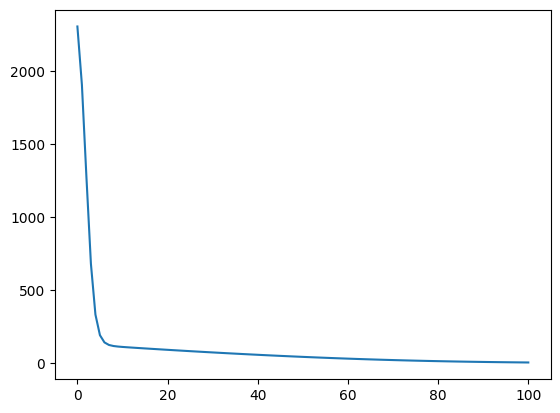

In [ ]:
import matplotlib.pyplot as plt
plt.plot(l)
print(l)